In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Types of classification models:
1. Discriminative functions and Classifier: Direct modelling between $x$ and $y$ and use parametric models.

2. Generative Classifier: Uses ```Bayes theorem``` on class conditional densities $p(x|y)$ for feature and prior probabilities of classes on $p(y)$.

3. Instance Based Models: Compare test example with training  example and assign class labels based on measure of similarity.

- Classification predicts the class label based on input feature vector $x$.

- Class label $y$ is a discrete quantity.
    - Ex : $Y$ = {0, 1}
    - $Y$ = {-1, +1}

Type of classification :

1. Single Label Classification : Each example has one label. Ex: yes, no.
    - Label is a scalar.

2. Multi-label Classification : Each example has one or more labels.Ex: Identify type of fruit.
    - Label is a vector i.e. column vector.
    \begin{align}
        y = \begin{pmatrix}
        y_1  \\
        y_2  \\
        y_3  \\
        .    \\
        .\\
        y_k\\
        \end{pmatrix}
    \end{align}
    - Depending on presence of label, corresponding label is set to 1.
    - One hot encoding is used for multi labels.
    - <img src='https://drive.google.com/uc?id=12xptHbJyzgN9uW3PYZIEf2S4SBsrEwi1'>

**Discriminant Functions**<br>
- In a binary classification the simplest discriminant function is similar to linear regression :
    \begin{align}
    y = w_0 + w^Tx
    \end{align}
    - $w_0$ = bias
    - $y$ = label
    - $w$ = weight vector
    - $x$ = feature

- The simplest discriminative function is a hyperplane in m-1 space.
- ![image.png](https://drive.google.com/uc?id=1p2Knkruj4sCdpN-nTeqnzDBWqnXBc1rY)

- 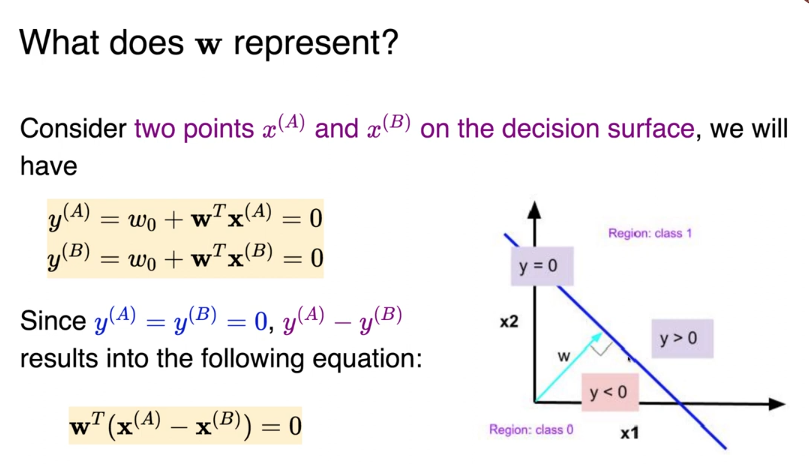

- $w$ is orthogonal to the decision boundary ans this $w$ determine the orientation of decision surface.
- Now for $w_0$:
    ![image.png](https://drive.google.com/uc?id=178Gaa5_ulnHUBPOSpkv8scSb5MeXO8DE)

- Summary :
![image.png](https://drive.google.com/uc?id=1Vc-eYJXKuOGl2YLjPXcqi0YNnbCnrNtS)

Prediction of a classifier :
\begin{align}
y = \left\{
\begin{array}{cl}
1, & w_0 +w^Tx > 0 \\
0, & \text{otherwise}
\end{array}
\right.
\end{align}
<br>
**Multiple classes**
Two ways of classification.
1. One -vs-rest : Build k-1 discriminant functions. Each discriminant function solves two class classification problem. class $c_k$ Vs not $c_k$.
2. One vs One : One discriminant function per pair of classes. Total function nC2.

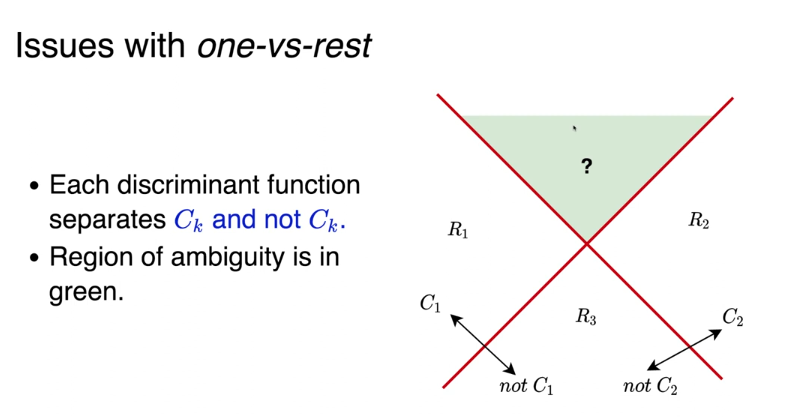

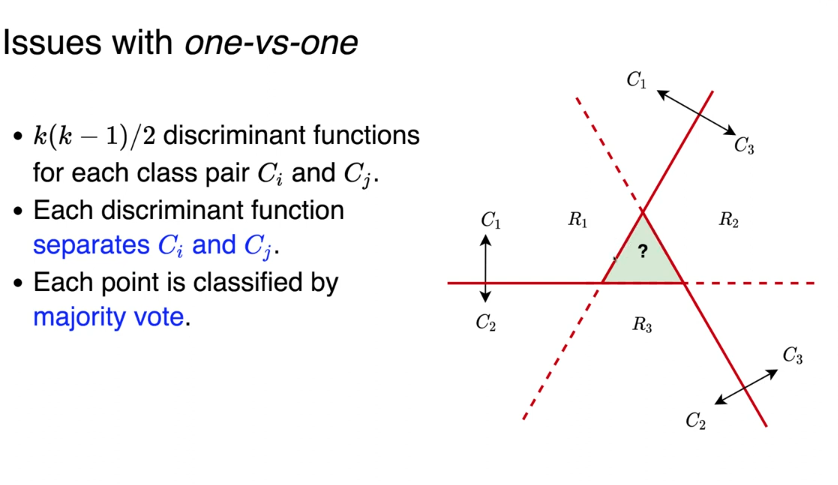

Polynomial Transformation

In [6]:
 # to perform combination import two libraries
import itertools
import functools

In [7]:
def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

In [8]:
def compute_new_features(items):
    return functools.reduce(lambda x, y:x*y, items)

In [9]:
def polynomial_transform(x:np.ndarray, degree:int):
    if x.ndim == 1:
        x = x[:, None]
    
    features = [np.ones(len(x))] # 1 for each feature dummy

    for degree in range(1, degree+1):
        for items in get_combinations(x.T, degree): # generate combination
            features.append(compute_new_features(items)) # combine the generated features
        
    return np.asarray(features).transpose()

## Classification on data


In [10]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers: # add 5 (pairs of (x, y)) outliers
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate((x0, x1, x_1)), np.concatenate((np.zeros(25), np.ones(30))).astype(int)
    if add_class: #add 25 (pairs of (x, y) additional data)
        x2 = np.random.normal(size=50).reshape(-1, 2) + 2
        return np.concatenate((x0, x1, x2)), np.concatenate((np.zeros(25), np.ones(25), 2 + np.zeros(25))).astype(int)
    return np.concatenate([x0, x1]), np.concatenate((np.zeros(25), np.ones(25))).astype(int)

Label Encoding <br>
Label $0$ represented by $[1, 0]$<br>
Label $1$ represented by $[0, 1]$

In [11]:
#@title Label Encoder
class LabelTransformer(object):
    """
    Label encoder decoder
    Attributes
    ----------
    n_classes : int
        number of classes, K
    """

    def __init__(self, n_classes:int=None):
        self.n_classes = n_classes

    @property
    def n_classes(self):
        return self.__n_classes

    @n_classes.setter
    def n_classes(self, K):
        self.__n_classes = K
        self.__encoder = None if K is None else np.eye(K)

    @property
    def encoder(self):
        return self.__encoder

    def encode(self, class_indices:np.ndarray):
        """
        encode class index into one-of-k code
        Parameters
        ----------
        class_indices : (N,) np.ndarray
            non-negative class index
            elements must be integer in [0, n_classes)
        Returns
        -------
        (N, K) np.ndarray
            one-of-k encoding of input
        """
        if self.n_classes is None:
            self.n_classes = np.max(class_indices) + 1

        return self.encoder[class_indices]

    def decode(self, onehot:np.ndarray):
        """
        decode one-of-k code into class index
        Parameters
        ----------
        onehot : (N, K) np.ndarray
            one-of-k code
        Returns
        -------
        (N,) np.ndarray
            class index
        """

        return np.argmax(onehot, axis=1)

In [12]:
BinaryLabel = LabelTransformer().encode(np.array([1,2,0,3]))
BinaryLabel

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [13]:
multiclass_label = LabelTransformer(3).encode(np.array([1,0,1,2]))
multiclass_label

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Simple logic for label encoding


In [14]:
def encode(arr:np.ndarray)->np.ndarray:
    encode = np.zeros((arr.size, arr.max()+1))
    encode[np.arange(arr.size), arr] = 1.0
    return encode

arr = np.array([1,4,3,2])
encode(arr)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

Preprocess the data

In [15]:
from sklearn.model_selection import train_test_split
def preprocess(add_class=False, add_outliers=False, degree=1):
    x, y = create_toy_data(add_outliers, add_class)
    x_poly = polynomial_transform(x, degree=degree)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y) 
    y_train_trans = LabelTransformer().encode(y_train)
    y_test_trans = LabelTransformer().encode(y_test)
    return x_train , x_test, y_train, y_test, y_train_trans, y_test_trans 

In [16]:
sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(x_train, labels, lsc, degree=1):
#     sns.set_style("white")
    f = plt.figure(figsize=(8,8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)) 
    x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc.predict(x_test_poly)
    
    sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.gca().set_aspect('equal', adjustable='box')

**Model**<br>
The label matrix can be calculated by multiplying $X$ with weight vectors. We need to add a dummy feature in $X$ before multiplying.

There is one weight vector per output. There fore totl number of parameters to be estimated are $(m+1) \ \text{x}\ k$.

**Model**
We use Ridge regularization to counter overfitting during model training.

In [17]:
class LeastSquareClassification(object):
    '''
    LSC Model

    y = np.where(X@w >= 0, 1)
    X: A feature matrix
    w:weight vector
    y:label vector
    '''

    def __init__(self):
        self.t0 = 20
        self.t1 = 1000

    def predict(self, X:np.ndarray):
        '''Predict output label for given input'''

        assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape} are not compatible"
        # trace of matrix
        return np.argmax(X@self.w, axis=-1) # gives maximum index

    def predict_internal(self, X:np.ndarray):
        assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape} are not compatible"
        return X@self.w

    def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
        '''
        Calculate loss :
        X : feature matrix
        y : output labels
        reg_rate = regularization rate
        '''
        e = y - self.predict_internal(X) # y - X@w
        return (1/2)*(np.transpose(e)@e) + (reg_rate/2)*(np.transpose(self.w) @ self.w)

    def fit(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
        '''
        Estimates the parameters of model by normal method
        X : feature matrix
        y : output labels
        reg_rate = regularization rate
        '''
        # solve Ax = b
        eye = np.eye(np.size(X, 1))
        self.w = np.linalg.solve(
            reg_rate*eye + X.T @X, 
            X.T@y)
        print(X.shape, y.shape, self.w.shape)
        
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict_internal(X) - y) + reg_rate * self.w # change made

    def update_weights(self, grad, lr):
        return (self.w - lr * grad)

    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)

    def sgd(self, X, y, num_epochs, reg_rate):
        self.err_all = []
        self.w_all = []
        self.w=np.zeros((X.shape[-1], y.shape[-1]))
        t=0
        for epoch in range(num_epochs):
            for iter in range(X.shape[0]):
                t = t+1
                random_index = np.random.randint(X.shape[0])
                x1 = X[random_index:random_index+1]
                y1 = y[random_index:random_index+1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(x1, y1, reg_rate))

                djdw = self.calculate_gradient(x1, y1, reg_rate)
                self.w = self.update_weights(djdw, self.learning_schedule(t))
        return self.w
    
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros((X.shape[-1], y.shape[-1]))
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            djdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(djdw, lr)
        return self.w

    # Mini batch
    def mbgd(self, X, y, num_epochs, batch_size, reg_rate):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()
        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y, reg_rate))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1, reg_rate)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))
        return self.w

In [18]:
x_train , x_test, y_train, y_test, y_train_trans, y_test_trans  = preprocess()

In [19]:
x_train.shape, y_train.shape

((37, 3), (37,))

In [20]:
assert x_train.shape[0] == y_train.shape[0], "Not enough labels for all training samples"

In [21]:
assert x_test.shape[0] == y_test.shape[0], "Not enough labels for all test samples"

In [22]:
lsc = LeastSquareClassification()
lsc.fit(x_train, y_train_trans, reg_rate=0)

(37, 3) (37, 2) (3, 2)


array([[ 0.41420592,  0.58579408],
       [-0.13303114,  0.13303114],
       [-0.21328854,  0.21328854]])

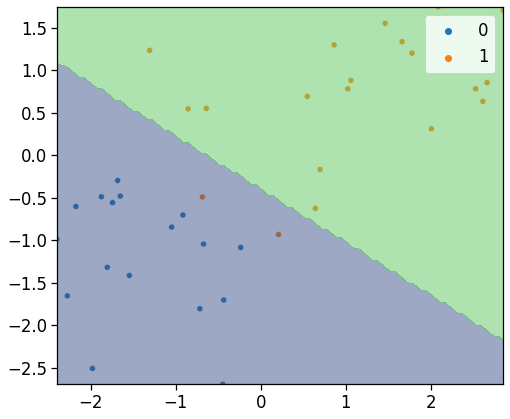

In [23]:
visualize_model(x_train, y_train, lsc)

In [24]:
def plot_learning_curve(err_all):
    err = [err[1][1] for err in err_all]
    plt.plot(np.arange(len(err)), err, 'r-')

## Gradient Descent

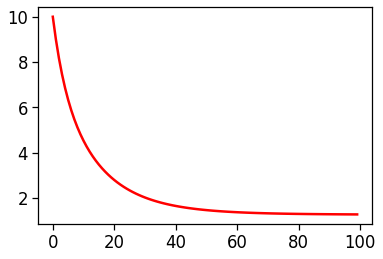

In [25]:
lsc.gd(x_train, y_train_trans, num_epochs=100
       ,lr=0.001,reg_rate=0)
plot_learning_curve(lsc.err_all)

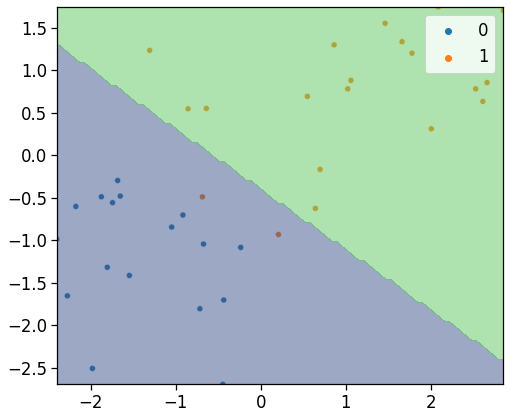

In [26]:
visualize_model(x_train, y_train, lsc)

## Stochastic Gradient Descent

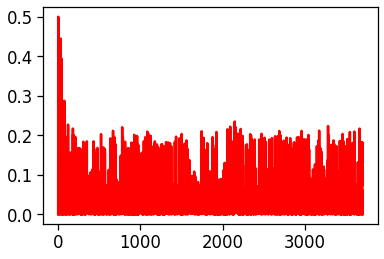

In [27]:
lsc.sgd(x_train, y_train_trans, num_epochs=100,
        reg_rate=0)
plot_learning_curve(lsc.err_all)

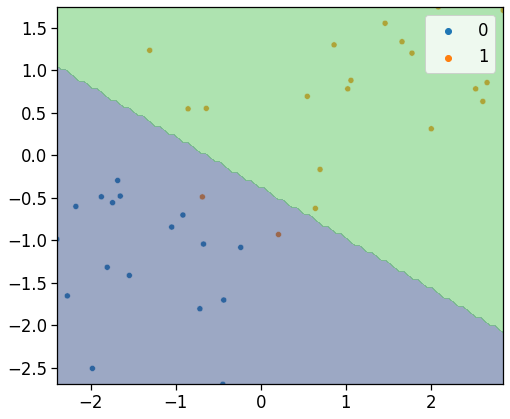

In [28]:
visualize_model(x_train, y_train, lsc)

Evaluation Metrics

In [30]:
from sklearn.metrics import classification_report
y_pred = lsc.predict(x_test)
print(classification_report(y_test, y_pred))
# y_pred

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      1.00      0.91         5

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13



In [33]:
tp = np.where((y_test==1)&(y_pred==1), 1, 0).sum()
tn = np.where((y_test==0)&(y_pred==0), 1, 0).sum()
fp = np.where((y_test==1)&(y_pred==0), 1, 0).sum()
fn = np.where((y_test==0)&(y_pred==1), 1, 0).sum()

In [34]:
tp, tn, fp, fn

(5, 7, 0, 1)

In [37]:
# from _typeshed import NoneType
def precision(tp, fp):
    if(tp+fp) == 0:
        return None
    return tp/(tp+fp)

In [38]:
def recall(tp, fn):
    if (tp + fn) == 0:
        return None
    return tp / (tp + fn)

In [39]:
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

In [40]:
def f1_score(pr, r):
    return 2 * ((pr * r) / (pr + r))

In [41]:
pr = precision(tp, fp)
r = recall(tp, fn)
pr, r, accuracy(tp, tn, fp, fn), f1_score(pr, r)

(1.0, 0.8333333333333334, 0.9230769230769231, 0.9090909090909091)

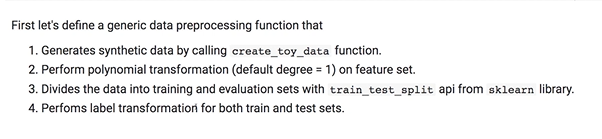